In [6]:
import torch
import matplotlib.pyplot as plt

In [10]:
result = torch.load('result.pt')


In [11]:
data = torch.load('vanderpol.pt')
ref_vae, prior, _ = torch.load('reference_model.pt')


In [12]:
C1 = data[0]['C']
C2 = data[1]['C']

linear_map = result[0].detach()


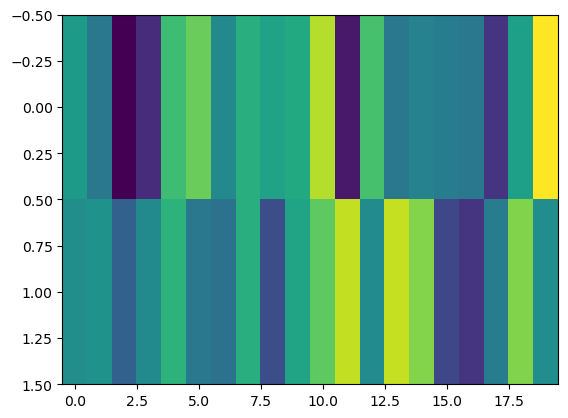

In [7]:

plt.imshow(C1,aspect='auto')


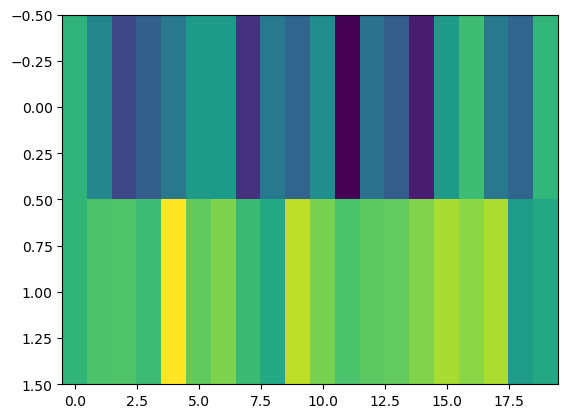

In [8]:
plt.imshow(C2@linear_map.numpy(),aspect='auto')


In [13]:
dy, dy_ref = linear_map.shape
y_tfm  = data[1]['y'].float()@linear_map

encoder_params, likelihood_params, log_prior = ref_vae(y_tfm, result[2])

y_tfm_recon = likelihood_params[0]

"now invert it back to original space"
# y_tfm_recon_original = (y_tfm_recon@torch.linalg.pinv(linear_map))@torch.linalg.pinv(rp_mat)
y_tfm_recon_original = torch.linalg.lstsq(linear_map.T, y_tfm_recon.reshape(-1,dy_ref).T)[0]



In [14]:
y_temp = y_tfm_recon_original.reshape((dy,1000,400))


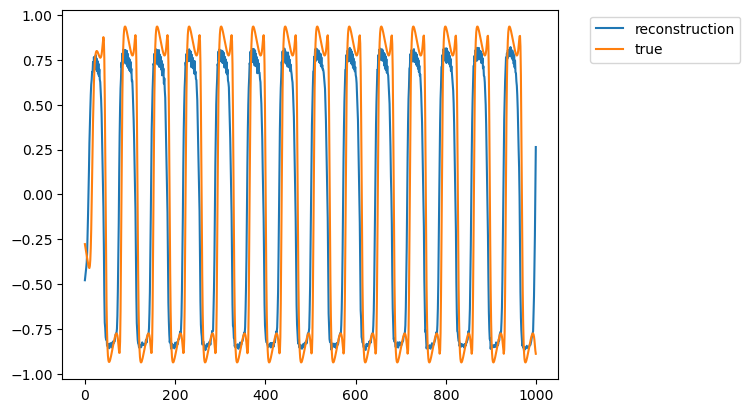

In [21]:
y_ind=0

plt.plot(y_temp[y_ind,:,0].detach(), label = 'reconstruction')
plt.plot(data[1]['y'].float()[:,0,y_ind], label = 'true')

plt.legend(bbox_to_anchor=(1.05,1))

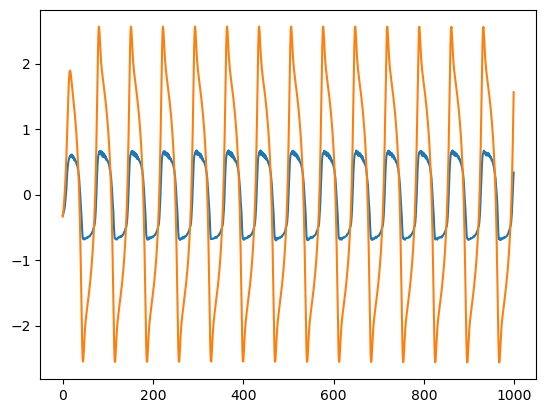

In [19]:
y_ind=3

plt.plot(y_temp[y_ind,:,0].detach())
plt.plot(data[1]['y'].float()[:,0,y_ind])
